<a href="https://colab.research.google.com/github/cobase2010/UTMB-Course-Mapping-to-Training/blob/main/UTMB_peak_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

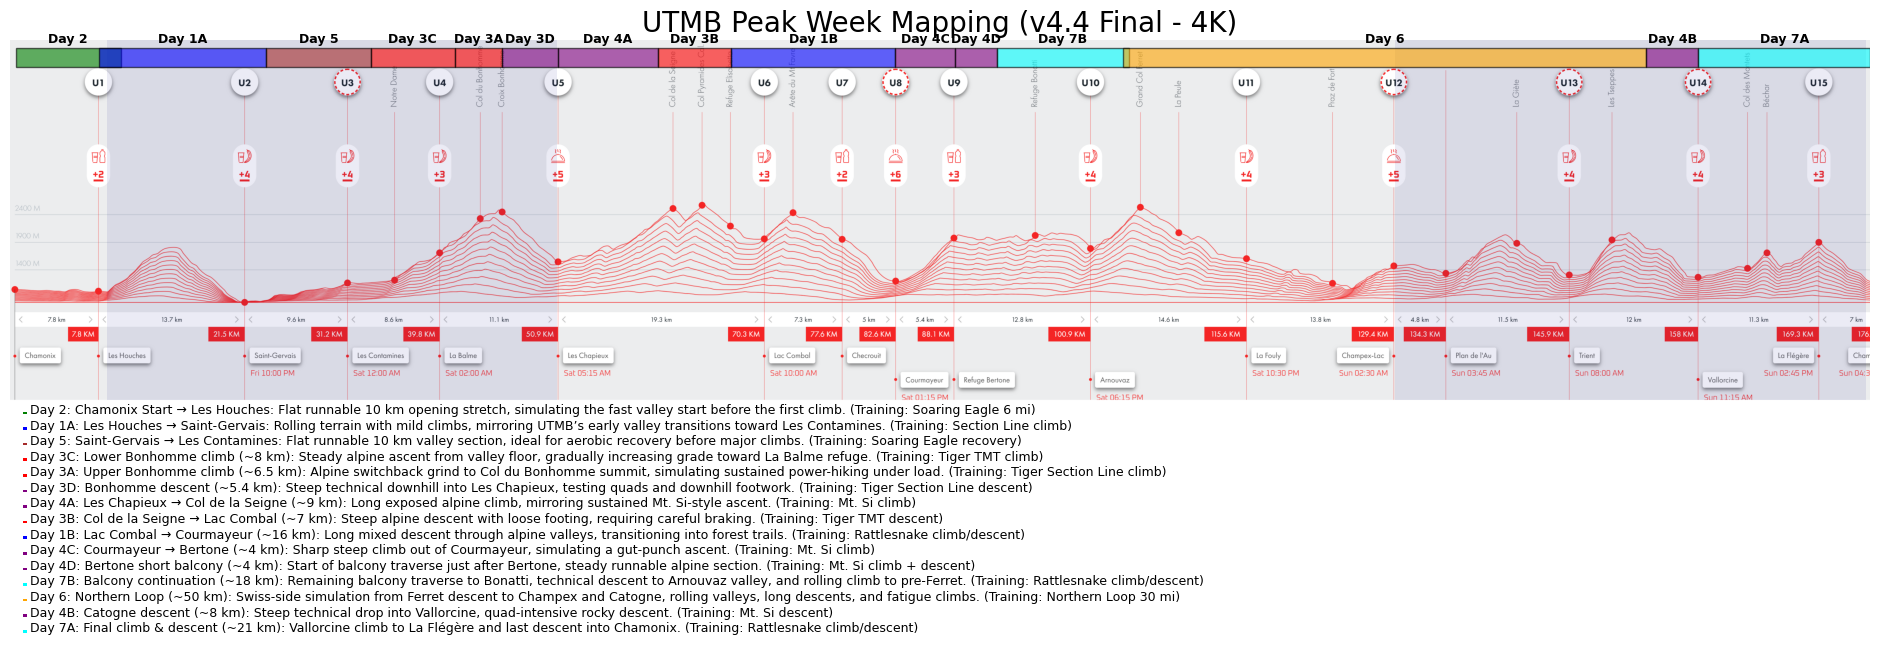

✅ 4K PNG export complete: UTMB_PeakWeek_v4.4_Final.png


In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# === Load UTMB image and expand canvas ===
img = Image.open("utmb.png")
width, height = img.size
img = img.crop((0, 0, int(width * 0.985), height))
extra_space = 1000
new_img = Image.new("RGB", (img.width, img.height + extra_space), (255, 255, 255))
new_img.paste(img, (0, 0))
img = new_img
height = img.size[1]

# === Constants ===
utmb_total_km = 176.4
start_anchor_x = 50
finish_anchor_x = img.size[0]

# === Aid Stations ===
aid_stations_km = {
    # Start/Finish
    "Chamonix Start": -0.7,
    "Chamonix Finish": 176.4,

    # Early race
    "Les Houches": 7.2,         # (approx. after runnable valley)
    "Les Contamines": 31.0,
    "Col du Bonhomme": 45.7,
    "Les Chapieux": 51.1,

    # Italian side
    "Lac Combal": 67.6,         # Before Courmayeur descent
    "Courmayeur": 83.3,
    "Refuge Bertone": 89.0,
    "Refuge Bonatti": 96.8,
    "Arnouvaz": 102.0,
    "Grand Col Ferret": 106.6,

    # Swiss side
    "La Fouly": 116.8,
    "Champex-Lac": 131.0,
    "Bovine": 142.7,            # High point above Champex
    "Trient": 147.5,
    "Catogne": 151.8,           # Climb after Trient
    "Vallorcine": 160.0,

    # Final climb
    "La Flégère": 171.5
}


# === Training Blocks with Detailed UTMB Descriptions ===
blocks_km = [
    # Day 2: Chamonix Start → Les Houches
    {"day": "Day 2", "color": "green",
     "desc": "Chamonix Start → Les Houches: Flat runnable 10 km opening stretch, simulating the fast valley start "
             "before the first climb. (Training: Soaring Eagle 6 mi)",
     "start_km": aid_stations_km["Chamonix Start"], "km": 10},

    # Day 1A: Les Houches → Saint-Gervais → Les Contamines
    {"day": "Day 1A", "color": "blue",
     "desc": "Les Houches → Saint-Gervais: Rolling terrain with mild climbs, mirroring UTMB’s early valley transitions "
             "toward Les Contamines. (Training: Section Line climb)",
     "start_km": aid_stations_km["Les Houches"], "km": 16},

    # Day 5: Saint-Gervais → Les Contamines flat runnable valley
    {"day": "Day 5", "color": "brown",
     "desc": "Saint-Gervais → Les Contamines: Flat runnable 10 km valley section, ideal for aerobic recovery before "
             "major climbs. (Training: Soaring Eagle recovery)",
     "start_km": aid_stations_km["Les Houches"] + 16, "km": 10},

    # Day 3C: Lower Bonhomme climb
    {"day": "Day 3C", "color": "red",
     "desc": "Lower Bonhomme climb (~8 km): Steady alpine ascent from valley floor, gradually increasing grade "
             "toward La Balme refuge. (Training: Tiger TMT climb)",
     "start_km": aid_stations_km["Les Houches"] + 16 + 10, "km": 8},

    # Day 3A: Upper Bonhomme climb to summit
    {"day": "Day 3A", "color": "red",
     "desc": "Upper Bonhomme climb (~6.5 km): Alpine switchback grind to Col du Bonhomme summit, simulating sustained "
             "power-hiking under load. (Training: Tiger Section Line climb)",
     "start_km": aid_stations_km["Les Houches"] + 16 + 10 + 8,
     "km": aid_stations_km["Col du Bonhomme"] - (aid_stations_km["Les Houches"] + 16 + 10 + 8)},

    # Day 3D: Bonhomme descent → Les Chapieux
    {"day": "Day 3D", "color": "purple",
     "desc": "Bonhomme descent (~5.4 km): Steep technical downhill into Les Chapieux, testing quads and downhill "
             "footwork. (Training: Tiger Section Line descent)",
     "start_km": aid_stations_km["Col du Bonhomme"],
     "km": aid_stations_km["Les Chapieux"] - aid_stations_km["Col du Bonhomme"]},

    # Day 4A: Les Chapieux → Col de la Seigne climb
    {"day": "Day 4A", "color": "purple",
     "desc": "Les Chapieux → Col de la Seigne (~9 km): Long exposed alpine climb, mirroring sustained Mt. Si-style "
             "ascent. (Training: Mt. Si climb)",
     "start_km": aid_stations_km["Les Chapieux"],
     "km": aid_stations_km["Lac Combal"] - aid_stations_km["Les Chapieux"] - 7},

    # Day 3B: Col de la Seigne → Lac Combal descent
    {"day": "Day 3B", "color": "red",
     "desc": "Col de la Seigne → Lac Combal (~7 km): Steep alpine descent with loose footing, requiring careful "
             "braking. (Training: Tiger TMT descent)",
     "start_km": aid_stations_km["Lac Combal"] - 7, "km": 7},

    # Day 1B: Lac Combal → Courmayeur descent
    {"day": "Day 1B", "color": "blue",
     "desc": "Lac Combal → Courmayeur (~16 km): Long mixed descent through alpine valleys, transitioning into "
             "forest trails. (Training: Rattlesnake climb/descent)",
     "start_km": aid_stations_km["Lac Combal"],
     "km": aid_stations_km["Courmayeur"] - aid_stations_km["Lac Combal"]},

    # Day 4C: Courmayeur → Bertone climb
    {"day": "Day 4C", "color": "purple",
     "desc": "Courmayeur → Bertone (~4 km): Sharp steep climb out of Courmayeur, simulating a gut-punch ascent. "
             "(Training: Mt. Si climb)",
     "start_km": aid_stations_km["Courmayeur"],
     "km": aid_stations_km["Refuge Bertone"] - aid_stations_km["Courmayeur"]},

    # Day 4D: Bertone short balcony section
    {"day": "Day 4D", "color": "purple",
     "desc": "Bertone short balcony (~4 km): Start of balcony traverse just after Bertone, "
             "steady runnable alpine section. (Training: Mt. Si climb + descent)",
     "start_km": aid_stations_km["Refuge Bertone"],
     "km": 4},

    # Day 7B: Extended balcony, Bonatti descent, and Arnouvaz climb
    {"day": "Day 7B", "color": "cyan",
     "desc": "Balcony continuation (~18 km): Remaining balcony traverse to Bonatti, "
             "technical descent to Arnouvaz valley, and rolling climb to pre-Ferret. "
             "(Training: Rattlesnake climb/descent)",
     "start_km": aid_stations_km["Refuge Bertone"] + 4,
     "km": aid_stations_km["Grand Col Ferret"] - (aid_stations_km["Refuge Bertone"] + 4) - 1},


    # Day 6: Northern Loop
    {"day": "Day 6", "color": "orange",
     "desc": "Northern Loop (~50 km): Swiss-side simulation from Ferret descent to Champex and Catogne, "
             "rolling valleys, long descents, and fatigue climbs. (Training: Northern Loop 30 mi)",
     "start_km": 105.0, "km": 50.0},

    # Day 4B: Catogne descent → Vallorcine
    {"day": "Day 4B", "color": "purple",
     "desc": "Catogne descent (~8 km): Steep technical drop into Vallorcine, quad-intensive rocky descent. "
             "(Training: Mt. Si descent)",
     "start_km": 155.0,
     "km": aid_stations_km["Vallorcine"] - 155.0},

    # Day 7A: Vallorcine → La Flégère → Chamonix
    {"day": "Day 7A", "color": "cyan",
     "desc": "Final climb & descent (~21 km): Vallorcine climb to La Flégère and last descent into Chamonix. "
             "(Training: Rattlesnake climb/descent)",
     "start_km": aid_stations_km["Vallorcine"],
     "km": aid_stations_km["Chamonix Finish"] - aid_stations_km["Vallorcine"]},
]




# === Helper: KM to X ===
def km_to_x(km):
    return start_anchor_x + (km / utmb_total_km) * (finish_anchor_x - start_anchor_x)

# === Plot ===
fig, ax = plt.subplots(figsize=(24, 14))  # 4K dimensions
ax.imshow(img)
ax.axis("off")
ax.set_title("UTMB Peak Week Mapping (v4.4 Final - 4K)", fontsize=20)

# === Night Markers ===
ax.add_patch(patches.Rectangle((km_to_x(8), 0), km_to_x(51)-km_to_x(8), height-extra_space, facecolor="navy", alpha=0.08))  # Night 1
ax.add_patch(patches.Rectangle((km_to_x(131), 0), km_to_x(176)-km_to_x(131), height-extra_space, facecolor="navy", alpha=0.08))  # Night 2

# # === Aid Stations ===
# for name, km in aid_stations_km.items():
#     x = km_to_x(km)
#     ax.axvline(x=x, color="red", linestyle="--", linewidth=1.5)
#     ax.text(x, height - extra_space - 15, name, ha="center", va="top", fontsize=10, color="red", rotation=90)

# === Training Blocks ===
block_height = 75
block_y = 30
for b in blocks_km:
    x_start = km_to_x(b["start_km"])
    width = km_to_x(b["start_km"] + b["km"]) - x_start
    rect = patches.Rectangle((x_start, block_y), width, block_height, facecolor=b["color"], alpha=0.6, edgecolor="black")
    ax.add_patch(rect)
    ax.text(x_start + width/2, block_y - 8, b["day"], ha="center", va="bottom", fontsize=9, fontweight="bold", color="black")

# === Legend ===
legend_y_start = img.size[1] - extra_space + 50
line_spacing = 60
for i, b in enumerate(blocks_km):
    y_pos = legend_y_start + i * line_spacing
    ax.add_patch(patches.Rectangle((50, y_pos - 6), 14, 10, facecolor=b["color"]))
    ax.text(75, y_pos, f"{b['day']}: {b['desc']}", fontsize=9, color="black", ha="left")

# === Export 4K PNG ===
fig.savefig("UTMB_PeakWeek_v4.4_Final.png", dpi=160, bbox_inches="tight", pad_inches=0)
plt.show()

print("✅ 4K PNG export complete: UTMB_PeakWeek_v4.4_Final.png")


In [ ]:
# === Save 4K PNG ===
fig.savefig("UTMB_PeakWeek_v4.3_Final.png", dpi=160, bbox_inches="tight", pad_inches=0)
print("✅ 4K PNG export complete: UTMB_PeakWeek_v4.3_Final.png")


✅ 4K PNG export complete: UTMB_PeakWeek_v4.3_Final.png
